# Airbnb Listings – Análisis y Predicción de Precios De AIRBNB
## 1. Introducción
### Objetivo del proyecto: 
Analizar y predecir los precios de alojamientos Airbnb. Explorar y limpiar el dataset de Airbnb, identificar patrones de precio y disponibilidad según barrio, tipo de habitación y características de los listings, preparando los datos para un posible modelado futuro.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)

## 2. Carga de datos
Carga el dataset de Airbnb 

In [50]:
link = 'data/AIRBNB/AIRBNB_US_2023.csv'
df = pd.read_csv(link, low_memory=False)
df_new= df.copy()
df_new.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco
5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,NaN,Bayview,37.71750,-122.39698,Private room,95,1,19,2023-01-28,0.12,2,365,1,San Francisco
6,142177,"Stylish, Spacious and Quiet Flat!",656263,Noreen,NaN,Outer Richmond,37.78440,-122.47932,Entire home/apt,259,5,234,2023-02-17,1.69,1,32,13,San Francisco
7,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,80,2022-11-26,0.74,1,331,1,San Francisco
8,10578,Classic Nob Hill Studio - Roof Deck,37049,Andrew,NaN,Nob Hill,37.79249,-122.41499,Entire home/apt,79,30,18,2015-05-17,0.13,1,230,0,San Francisco
9,12041,Sunny/Sunset view room UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76901,-122.44701,Private room,65,32,7,2022-06-11,0.05,13,365,1,San Francisco


In [51]:
df_new.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [53]:
df_new.shape

(232147, 18)

In [54]:
df_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


## 3. Limpieza de datos
- Manejo de valores nulos.
- Eliminación de duplicados.
- Conversión de tipos de datos.


### 3.1 Manejo de valores nulos 

In [55]:
df_new.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [56]:
df_new[['name','host_name']] = df_new[['name','host_name']].fillna('NaN')
df_new['neighbourhood_group'] = df_new['neighbourhood_group'].fillna('Not in a Group')
df_new = df_new.drop(['reviews_per_month'], axis= 1)

In [57]:
df_new.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       49085
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
city                                  0
dtype: int64

### 3.2 eliminación de duplicados

In [58]:
duplicados = df_new.duplicated()
duplicados.value_counts()


False    232147
Name: count, dtype: int64

In [59]:
# Revisar duplicados por columnas clave
duplicados = df.duplicated(subset=['host_id', 'name', 'latitude', 'longitude'])
duplicados.value_counts()

False    229913
True       2234
Name: count, dtype: int64

### 3.3 conversion de tipos de datos 

In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232147 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232147 non-null  object 
 4   neighbourhood_group             232147 non-null  object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

En esta base de datos no es necesario modificar los tipos de datos de las columnas ya que todas las columnas no lo necesita.

In [61]:
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Not in a Group,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,Not in a Group,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Not in a Group,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,Not in a Group,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Not in a Group,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,2,159,34,San Francisco


## 4. Análisis exploratorio (EDA)
- Distribución de precios.
- Relación entre variables.


### 4.1 Distribución de precios  

In [62]:
df_new['price'].value_counts(ascending=False)

price
150     4584
100     3874
99      3143
200     3016
125     2808
        ... 
8800       1
1601       1
6075       1
6875       1
9429       1
Name: count, Length: 2429, dtype: int64

In [63]:
precios_filtrados = df_new[df_new['price'] < 1000]['price']
precios_filtrados

0         202
1         235
2          56
3         575
4         110
         ... 
232142    389
232143    158
232144     97
232145     62
232146     85
Name: price, Length: 226162, dtype: int64

In [64]:
percentil_1000 = (df['price'] < 500).mean() * 100
print(f"El valor 1000 está aproximadamente en el percentil {percentil_1000:.2f}")


El valor 1000 está aproximadamente en el percentil 91.99


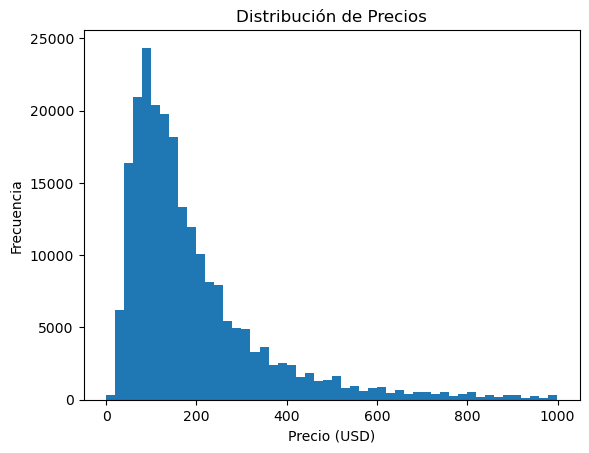

In [65]:
plt.hist(precios_filtrados, bins= 50)
plt.title('Distribución de Precios')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

### 4.2 Relación entre variables

In [66]:
corr = df_new.select_dtypes(include='number').corr()
print(corr['price'].sort_values(ascending=False))  # ver correlación con price


price                             1.000000
host_id                           0.020140
calculated_host_listings_count    0.018823
id                                0.017181
availability_365                  0.015663
minimum_nights                   -0.022933
longitude                        -0.023272
number_of_reviews_ltm            -0.035012
number_of_reviews                -0.035233
latitude                         -0.041702
Name: price, dtype: float64


In [67]:
df_corr = df_new[['room_type','price','minimum_nights','availability_365','city']]
corr_price = df_new.select_dtypes(include='number').corr()
corr_price['price'].sort_values(ascending=False)

price                             1.000000
host_id                           0.020140
calculated_host_listings_count    0.018823
id                                0.017181
availability_365                  0.015663
minimum_nights                   -0.022933
longitude                        -0.023272
number_of_reviews_ltm            -0.035012
number_of_reviews                -0.035233
latitude                         -0.041702
Name: price, dtype: float64

## 5. Feature Engineering
Crea nuevas variables relevantes como:
- `log_price`
- `days_since_host_joined`


### 5.1 Crear variable log_price

In [68]:
df_new['log_price'] = np.log(df_new['price'])
df_new.head(10)

c:\Users\juan_\miniconda3\envs\Projectos_AIRBNB-HOMECREDIT\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,log_price
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Not in a Group,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,1,128,59,San Francisco,5.308268
1,5858,Creative Sanctuary,8904,Philip And Tania,Not in a Group,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,1,365,0,San Francisco,5.459586
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Not in a Group,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,13,365,1,San Francisco,4.025352
3,8339,Historic Alamo Square Victorian,24215,Rosy,Not in a Group,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,2,365,0,San Francisco,6.354370
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Not in a Group,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,2,159,34,San Francisco,4.700480
5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,Not in a Group,Bayview,37.71750,-122.39698,Private room,95,1,19,2023-01-28,2,365,1,San Francisco,4.553877
6,142177,"Stylish, Spacious and Quiet Flat!",656263,Noreen,Not in a Group,Outer Richmond,37.78440,-122.47932,Entire home/apt,259,5,234,2023-02-17,1,32,13,San Francisco,5.556828
7,490931,"Mission's ""La Lengua""",1269188,Maureen,Not in a Group,Bernal Heights,37.74766,-122.42041,Private room,100,30,80,2022-11-26,1,331,1,San Francisco,4.605170
8,10578,Classic Nob Hill Studio - Roof Deck,37049,Andrew,Not in a Group,Nob Hill,37.79249,-122.41499,Entire home/apt,79,30,18,2015-05-17,1,230,0,San Francisco,4.369448
9,12041,Sunny/Sunset view room UCSF/USF - San Francisco,21994,Aaron,Not in a Group,Haight Ashbury,37.76901,-122.44701,Private room,65,32,7,2022-06-11,13,365,1,San Francisco,4.174387


### 5.2 Crear Variable days_since_host_joined

In [69]:
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,log_price
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Not in a Group,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,1,128,59,San Francisco,5.308268
1,5858,Creative Sanctuary,8904,Philip And Tania,Not in a Group,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,1,365,0,San Francisco,5.459586
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Not in a Group,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,13,365,1,San Francisco,4.025352
3,8339,Historic Alamo Square Victorian,24215,Rosy,Not in a Group,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,2,365,0,San Francisco,6.354370
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Not in a Group,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,2,159,34,San Francisco,4.700480


In [70]:
# Aseguramos que last_review sea tipo fecha
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Evitar división por cero o NaN
df['reviews_per_month'] = df['reviews_per_month'].replace(0, np.nan)

# Calcular meses aproximados desde la primera reseña
df_new['estimated_months_active'] = df['number_of_reviews'] / df['reviews_per_month']

# Calcular la fecha aproximada de la primera reseña
df_new['estimated_first_review'] = df['last_review'] - pd.to_timedelta(df_new['estimated_months_active'] * 30, unit='D')

# Calcular los días desde esa fecha hasta hoy
today = pd.Timestamp.today()
df_new['days_since_host_joined_approx'] = (today - df_new['estimated_first_review']).dt.days

# Verificar resultado
df_new[['last_review', 'estimated_first_review', 'days_since_host_joined_approx']].head()


,last_review,estimated_first_review,days_since_host_joined_approx
0,2023-02-19,2009-07-07 23:22:35.844155812,5962.0
1,2017-08-06,2003-10-13 13:05:27.272727226,8056.0
2,2022-10-27,2014-08-10 00:00:00.000000000,4103.0
3,2019-06-28,2005-12-16 19:45:52.941176488,7261.0
4,2023-02-25,2009-07-20 06:11:36.774193607,5950.0


In [71]:
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,log_price,estimated_months_active,estimated_first_review,days_since_host_joined_approx
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Not in a Group,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,1,128,59,San Francisco,5.308268,165.800866,2009-07-07 23:22:35.844155812,5962.0
1,5858,Creative Sanctuary,8904,Philip And Tania,Not in a Group,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,1,365,0,San Francisco,5.459586,168.181818,2003-10-13 13:05:27.272727226,8056.0
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Not in a Group,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,13,365,1,San Francisco,4.025352,100.000000,2014-08-10 00:00:00.000000000,4103.0
3,8339,Historic Alamo Square Victorian,24215,Rosy,Not in a Group,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,2,365,0,San Francisco,6.354370,164.705882,2005-12-16 19:45:52.941176488,7261.0
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Not in a Group,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,2,159,34,San Francisco,4.700480,165.591398,2009-07-20 06:11:36.774193607,5950.0


## 6. Modelado
- Regresión lineal, Random Forest
- Evaluación (RMSE, MAE, R²).


In [72]:
df_new.corr(method='pearson' ,numeric_only=True)['price'].sort_values(ascending=True)

latitude                         -0.041702
number_of_reviews                -0.035233
number_of_reviews_ltm            -0.035012
longitude                        -0.023272
minimum_nights                   -0.022933
estimated_months_active          -0.011624
days_since_host_joined_approx    -0.008016
availability_365                  0.015663
id                                0.017181
calculated_host_listings_count    0.018823
host_id                           0.020140
log_price                         0.402566
price                             1.000000
Name: price, dtype: float64

### Observación
Se puede apreciar en la tabla de correlaciones que no existe una correlacion lineal para esta base de datos. En este caso, una *Regresión lineal* no es buena para poder realizar el modelado. Aunque no haya una correlación lineal, se realizará el modelo de Random Forest, ya que este modelo es no lineal. 

In [73]:
df_encode = pd.get_dummies(df_new, columns=['room_type','neighbourhood'], dtype=int)
df_encode.shape

(232147, 1435)

In [74]:
neighbourhoods = [col for col in df_encode.columns if col.startswith('neighbourhood')]

In [86]:
df_encode = df_encode[df_encode['price'] <= 1000]
df_encode.shape

(221579, 1435)

In [76]:
df_encode.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,log_price,estimated_months_active,estimated_first_review,days_since_host_joined_approx,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_28704,neighbourhood_28715,neighbourhood_28732,neighbourhood_28801,neighbourhood_28803,neighbourhood_28804,neighbourhood_28805,neighbourhood_28806,neighbourhood_78701,neighbourhood_78702,neighbourhood_78703,neighbourhood_78704,neighbourhood_78705,neighbourhood_78712,neighbourhood_78717,neighbourhood_78719,neighbourhood_78721,neighbourhood_78722,neighbourhood_78723,neighbourhood_78724,neighbourhood_78725,neighbourhood_78726,neighbourhood_78727,neighbourhood_78728,neighbourhood_78729,neighbourhood_78730,neighbourhood_78731,neighbourhood_78732,neighbourhood_78733,neighbourhood_78734,neighbourhood_78735,neighbourhood_78736,neighbourhood_78737,neighbourhood_78738,neighbourhood_78739,neighbourhood_78741,neighbourhood_78742,neighbourhood_78744,neighbourhood_78745,neighbourhood_78746,neighbourhood_78747,neighbourhood_78748,neighbourhood_78749,neighbourhood_78750,neighbourhood_78751,neighbourhood_78752,neighbourhood_78753,neighbourhood_78754,neighbourhood_78756,neighbourhood_78757,neighbourhood_78758,neighbourhood_78759,neighbourhood_Acorn-Acorn Industrial,neighbourhood_Acton,neighbourhood_Adams,neighbourhood_Adams Point,neighbourhood_Adams-Normandie,neighbourhood_Agassiz,neighbourhood_Agoura Hills,neighbourhood_Agua Dulce,neighbourhood_Alameda,neighbourhood_Albany Park,neighbourhood_Algiers Point,neighbourhood_Alhambra,neighbourhood_Alki,neighbourhood_Allendale,neighbourhood_Allerton,neighbourhood_Allied Gardens,neighbourhood_Allston,neighbourhood_Alondra Park,neighbourhood_Alta Vista,neighbourhood_Altadena,neighbourhood_Amphitheater And Water Park,neighbourhood_Angeles Crest,neighbourhood_Anoka,neighbourhood_Arbor Heights,neighbourhood_Arbor Lodge,neighbourhood_Arcadia,neighbourhood_Archer Heights,neighbourhood_Arden Heights,neighbourhood_Ardenwald-Johnson Creek,neighbourhood_Area 2/MIT,neighbourhood_Argay,neighbourhood_Arleta,neighbourhood_Arlington Heights,neighbourhood_Armour Square,neighbourhood_Arnold Creek,neighbourhood_Arrochar,neighbourhood_Arroyo Viejo,neighbourhood_Artesia,neighbourhood_Arverne,neighbourhood_Ashburn,neighbourhood_Ashcreek,neighbourhood_Astoria,neighbourhood_Athens,neighbourhood_Atherton,neighbourhood_Athmar Park,neighbourhood_Atlantic,neighbourhood_Atwater Village,neighbourhood_Auburn Gresham,neighbourhood_Audubon,neighbourhood_Auraria,neighbourhood_Austin,neighbourhood_Avalon,neighbourhood_Avalon Park,neighbourhood_Avocado Heights,neighbourhood_Avondale,neighbourhood_Azusa,neighbourhood_B. W. Cooper,neighbourhood_Back Bay,neighbourhood_Baker,neighbourhood_Balboa Park,neighbourhood_Baldwin Hills/Crenshaw,neighbourhood_Baldwin Park,neighbourhood_Bancroft Business-Havenscourt,neighbourhood_Bario Logan,neighbourhood_Barnum,neighbourhood_Barnum West,neighbourhood_Barrington,neighbourhood_Bartlett,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ho,neighbourhood_Bay Park,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,neighbourhood_Bay Village,neighbourhood_Baychester,neighbourhood_Bayou St. John,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bayview,neighbourhood_Beacon Hill,neighbourhood_Bear Valley,neighbourhood_Beaumont-Wilshire,neighbourhood_Bedford-Stuyvesant,neighbourhood_Behrman,neighbourhood_Bel-Air,neighbourhood_Belcaro,neighbourhood_Bell,neighbourhood_Bell Gardens,neighbourhood_Bella Vista,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Bellflower,neighbourhood_Belltown,neighbourhood_Belmont,neighbourhood_Belmont Cragin,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Berkeley,neighbourhood_Bernal Heights,neighbourhood_Beverly,neighbourhood_Beverly C

### Random forest

In [77]:
precios_encode = df_encode['price']

In [78]:
X= df_encode[['room_type_Entire home/apt','room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'availability_365','estimated_months_active','number_of_reviews','days_since_host_joined_approx']]
y= precios_encode

print(X.shape)
print(y.shape)

(221579, 8)
(221579,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
print(X_train.shape)
print(y_train.shape)

(177263, 8)
(177263,)


In [81]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
rf_predict= rf_model.predict(X_test)    

In [83]:
mse_rf= mean_squared_error(y_test, rf_predict)
r2_rf= r2_score(y_test,rf_predict)
mae_rf= mean_absolute_error(y_test, rf_predict)

print('Random Forest MSE: ', mse_rf)
print('Random Forest R2: ', r2_rf)
print('Random Forest MAE: ', mae_rf)

Random Forest MSE:  14166.983024469464
Random Forest R2:  0.123656098597267
Random Forest MAE:  86.07541499112125


In [84]:
y_test.sort_values()

152565      0
39253       0
170311      0
159236      0
50318       0
         ... 
94422     700
196707    700
68128     700
57008     700
38746     700
Name: price, Length: 44316, dtype: int64

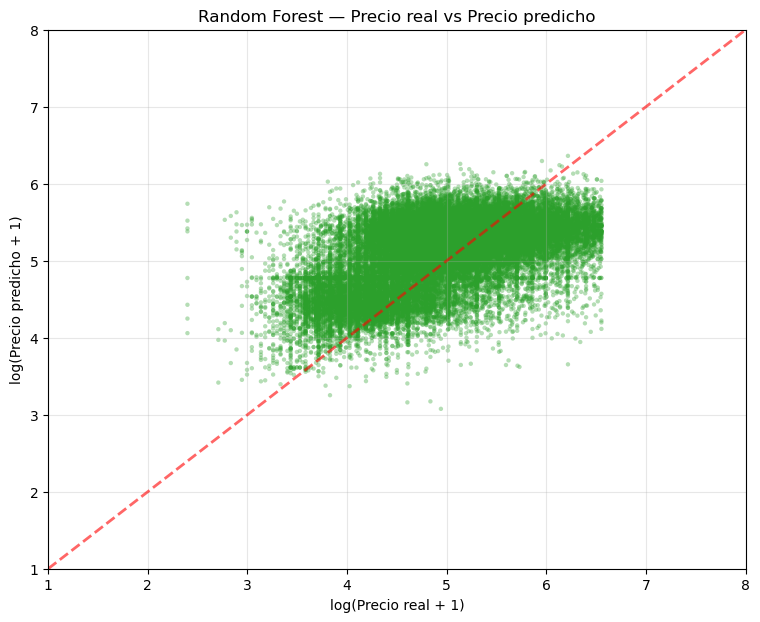

In [114]:
y_true = y_test.values
y_pred = rf_predict

y_true_log = np.log1p(y_true) 
y_pred_log = np.log1p(y_pred)

plt.figure(figsize=(9,7))
plt.scatter(y_true_log, y_pred_log, s=10, alpha=0.35, c='tab:green', edgecolor='none')
lims = [min(y_true_log.min(),y_pred_log.min()),max(y_true_log.max(),y_pred_log.max())]
plt.plot([1,8], [1,8], 'r--', linewidth=2, alpha=0.6)
plt.xlim(1,8)
plt.ylim(1,8)

plt.xlabel('log(Precio real + 1)')
plt.ylabel('log(Precio predicho + 1)')
plt.title('Random Forest — Precio real vs Precio predicho')

plt.grid(alpha=0.3)
plt.show()


## 7. Interpretación y conclusiones
Analiza la importancia de las variables y conclusiones generales.


**Resumen general.**  
El objetivo del proyecto fue analizar las variables que influyen en el precio de alojamientos en Airbnb y construir un modelo de regresión capaz de predecir esos precios. Tras limpieza, creación de variables (por ejemplo `log_price` y `days_since_host_joined_approx`), codificación de variables categóricas y filtrado de valores extremos (se trabajó con un corte en `price` para limitar la influencia de outliers), entrenamos un modelo Random Forest y evaluamos su desempeño.

**Qué muestra el modelo.**  
- La nube de puntos en la gráfica *Precio real vs. Precio predicho* (con eje en escala log) muestra una relación positiva: el modelo captura la dirección general (aumentos en precio real tienden a aumentar la predicción).  
- Sin embargo, la dispersión alrededor de la línea `y = x` indica que hay variabilidad no explicada — el modelo acierta en la tendencia general pero comete errores a nivel de observación individual, especialmente en los extremos de precio.

**Fortalezas del enfoque actual.**  
- El uso de transformación logarítmica estabiliza la influencia de valores extremos y permite que las métricas (RMSE/MAE) sean menos dominadas por outliers.  
- La inclusión de variables de negocio (antigüedad del anfitrión, dummies de tipo de habitación y disponibilidad) aporta señales relevantes que el modelo aprovecha.  
- El Random Forest es robusto frente a relaciones no lineales y outliers moderados, por lo que es una buena primera opción para este problema.

**Limitaciones detectadas.**  
- El modelo, en su configuración por defecto, tiende a **tener más error en los precios altos** (cola larga) y a veces a sobre/ subestimar valores muy puntuales. Esto es común cuando hay pocos ejemplos de precios extremos.  
- No se optimizaron hiperparámetros; es probable que una búsqueda controlada (Randomized/Grid search) mejore rendimiento.  
- Las métricas globales (R², MAE, RMSE) deben complementarse con análisis por segmento (por ejemplo: bajo, medio y alto precio) para entender mejor dónde mejorar.

**siguientes pasos.**  
1. **Optimizar hiperparámetros** del Random Forest (`n_estimators`, `max_depth`, `min_samples_leaf`) usando `RandomizedSearchCV` para ganar estabilidad y reducir error.  
2. **Probar modelos de boosting** (LightGBM / XGBoost / CatBoost): suelen mejorar precisión en regresión de precios y manejar mejor la cola larga.  
3. **Feature engineering adicional**: crear `price_per_person`, interacciones entre barrio y tipo de habitación, y tasas relativas de reviews (`reviews_density`) puede agregar señales predictivas.  
4. **Evaluación por segmento**: calcular métricas separadas por percentiles de precio (p. ej. 0–50, 50–90, 90–100) para diagnosticar fallos en la cola.  
5. **Explicar importancia de variables**: incluir gráfico de `feature_importances_` y una breve interpretación comercial de las 5 variables más importantes.

# Conclusión  
En conjunto, el proyecto demuestra la utilidad de la ciencia de datos para entender el comportamiento del mercado de alojamientos y estimar precios de forma automatizada. El modelo desarrollado, basado en Random Forest, logra capturar relaciones clave entre las características del anuncio y su precio, ofreciendo una estimación confiable a nivel agregado.  
Aun con márgenes de mejora, el flujo de trabajo implementado (limpieza, exploración, ingeniería de variables, modelado y evaluación) constituye una base sólida que podría integrarse en un sistema de recomendación o una herramienta de estimación de precios para anfitriones.  
Los próximos pasos se centrarían en optimizar el modelo, enriquecer las variables y comunicar los resultados de forma visual y comprensible para el público no técnico.  
En resumen, el análisis realizado no solo permite predecir precios, sino también **comprender mejor el mercado de Airbnb**, aportando información valiosa para la toma de decisiones y la planificación estratégica dentro del contexto del alojamiento turístico.